In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency, ttest_ind, levene
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

## Direction for proceeding with the dataset

* Its a classification problem, Non parametric at best. (Initial Analysis reports large skewness in data)
* Immediate Solution Response ( Random Forest/ Decision Tree/ K Nearest Neighbors/ Support Vector Machines/ Voting/ Stacking/ Bagging/ Boosting)
* Target variable, Imbalanced, under sampled data. (85%,15% ratio) (Need to use SMOTE).
* Conduct Statistical Test with respect to features and give reasons for rejecting or accepting the Hypothesis.

## Inital Look at the Data

In [2]:
# Reading the csv file into a dataframe
master_df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Taking a look at the data
master_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Information Regarding the Attributes of the data
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Making a copy of master dataframe
df = master_df.copy(deep=True)

# Exploratory Data Analysis
## Revenue Column
* It is a qualitative valued feature.
* It is a classification problem from the problem statement.
* This data reinforces the problem statement.

In [6]:
# Revenue Class in terms of values
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [7]:
# Revenue Class in terms of Percentage
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

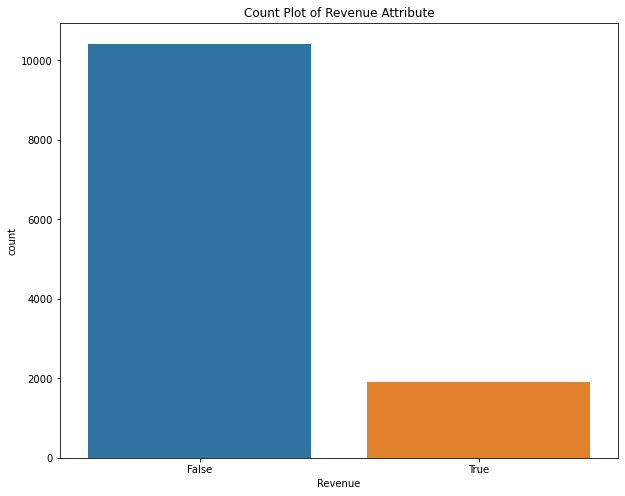

In [8]:
# Count plot
plt.figure(figsize=(10,8))
plt.title('Count Plot of Revenue Attribute')
sns.countplot(df['Revenue'])
plt.show()


#### Observation:

* The data is heavily imbalanced.
* We might have to use SMOTE(Synthetic Minority OverSampling Technique).

## Administrative Column
* If my understanding about the administrative column is right, then the column means the number of   pages 
* visited by the user during that particular session.
* The values should be discrete in nature.
This could act as categorical in nature.

 We can classify or group these values into 3 groups :-
* High Page visits Group
* Moderate Page visits Group
* Low Page visits Group

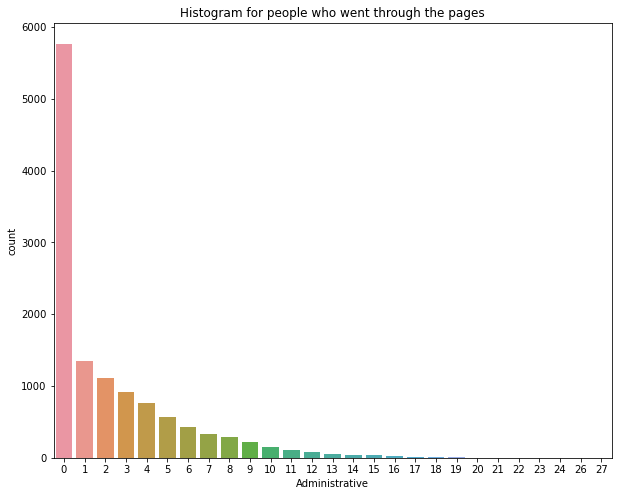

In [9]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Histogram for people who went through the pages')
sns.countplot(df['Administrative'])
plt.show()

In [10]:
# Percentage of value counts in each category
df['Administrative'].value_counts(normalize=True)

0     0.467802
1     0.109813
2     0.090349
3     0.074209
4     0.062044
5     0.046634
6     0.035036
7     0.027413
8     0.023277
9     0.018248
10    0.012409
11    0.008516
12    0.006975
13    0.004542
14    0.003569
15    0.003082
16    0.001946
17    0.001298
18    0.000973
19    0.000487
24    0.000324
22    0.000324
23    0.000243
20    0.000162
21    0.000162
26    0.000081
27    0.000081
Name: Administrative, dtype: float64

In [11]:
# Converting it into category
df['Administrative'] = df['Administrative'].astype('category')

In [12]:
# Statistical Summary of Administrative Column
df['Administrative'].describe()

count     12330
unique       27
top           0
freq       5768
Name: Administrative, dtype: int64

## Relation with our Target attribute

In [13]:
ct = pd.crosstab(index=df['Revenue'],columns=df['Administrative']) # Creating a Crosstab
ct

Administrative,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,26,27
Revenue,,,,,,,,,,,,,,,,,,,,,
False,5254,1063,909,741,612,457,321,272,214,164,...,12,10,5,1,2,2,3,4,0,1
True,514,291,205,174,153,118,111,66,73,61,...,4,2,1,1,0,2,0,0,1,0


#### Application of Chi- Square Test

In [14]:
chi2_contingency(ct) # Conducting a Chi-Square test for 2 categories

(414.9767598349634,
 1.0921137453222899e-71,
 26,
 array([[4.87543358e+03, 1.14447591e+03, 9.41614599e+02, 7.73408759e+02,
         6.46620438e+02, 4.86021898e+02, 3.65150365e+02, 2.85696350e+02,
         2.42588321e+02, 1.90182482e+02, 1.29324088e+02, 8.87518248e+01,
         7.26919708e+01, 4.73343066e+01, 3.71912409e+01, 3.21197080e+01,
         2.02861314e+01, 1.35240876e+01, 1.01430657e+01, 5.07153285e+00,
         1.69051095e+00, 1.69051095e+00, 3.38102190e+00, 2.53576642e+00,
         3.38102190e+00, 8.45255474e-01, 8.45255474e-01],
        [8.92566423e+02, 2.09524088e+02, 1.72385401e+02, 1.41591241e+02,
         1.18379562e+02, 8.89781022e+01, 6.68496350e+01, 5.23036496e+01,
         4.44116788e+01, 3.48175182e+01, 2.36759124e+01, 1.62481752e+01,
         1.33080292e+01, 8.66569343e+00, 6.80875912e+00, 5.88029197e+00,
         3.71386861e+00, 2.47591241e+00, 1.85693431e+00, 9.28467153e-01,
         3.09489051e-01, 3.09489051e-01, 6.18978102e-01, 4.64233577e-01,
         6.18978

## Hypothesis

* *H0: There is no relation between the Administrative Column and the Revenue Column
* *Ha: There is a relation between the Administrative Column and the Revenue Column.

#### Observation

* The p-value of the chi-square test is 1.0921137453222899e-71.
* This value is less than critical value of 0.05.
* This allows us to reject the null hypothesis H0
* Decision: This feature is a significant feature in prediction of our target feature.

## Administrative Duration Column
As of my understanding, this should mean the duraction spent by the person browsing the pages.
These values can be taken only as continious values.

C:\Users\91917\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


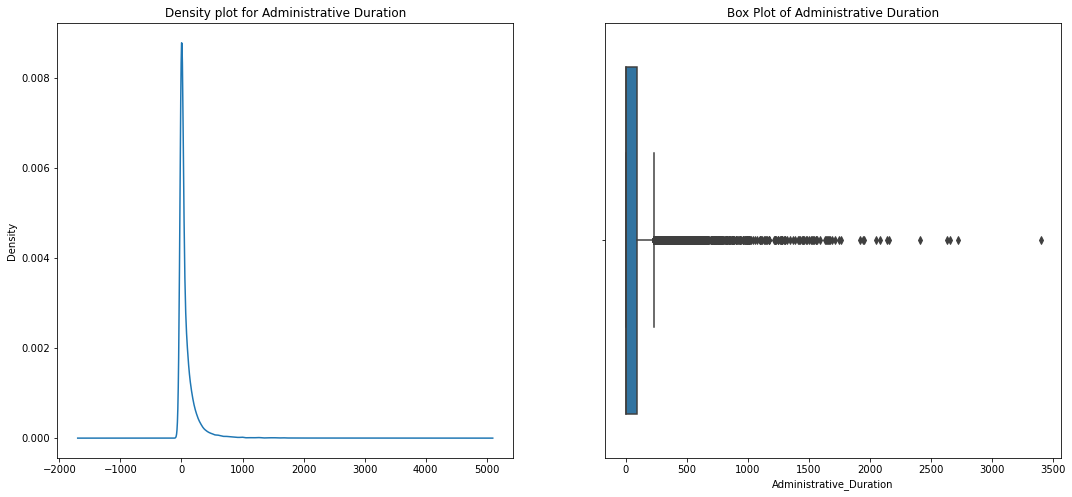

In [15]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['Administrative_Duration'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Administrative Duration')

sns.boxplot(df['Administrative_Duration'],ax=axes[1],orient='v')
axes[1].set_title('Box Plot of Administrative Duration')
plt.show()

## Observation:

* The data seems skewed to the right.
* Need to check for normality of the data.

In [16]:
# Statistical Summary of Administrative Duration Attribute
df['Administrative_Duration'].describe()

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

In [17]:
# Skewness
df['Administrative_Duration'].skew()

5.61571901877419

## Relation with the Target attribute

In [18]:
# Seperating the values for independant t test
adminduration_a = df[df['Revenue']==True]['Administrative_Duration']
adminduration_b = df[df['Revenue']==False]['Administrative_Duration']

In [19]:
# Conducting a independant ttest
ttest_ind(adminduration_a,adminduration_b)

Ttest_indResult(statistic=10.436882428979535, pvalue=2.146513634744256e-25)

In [20]:
# Non Parametric Test incase of Non Parametric Model
# We are choosing median becuase our data is skewed
levene(adminduration_a,adminduration_b,center='median')

LeveneResult(statistic=62.337639832485486, pvalue=3.1376733574150832e-15)

## Hypothesis

* *H0: There is no relation between the Administrative Column and the Revenue Column
* *Ha: There is a relation between the Administrative Column and the Revenue Column.

#### Observation

The p-values are less than the α or the critical value 0.05.
Thus we can reject the null hypothesis *H0* and accept the alternative hypothesis *Ha*.

* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

## Informational Column
* If my understanding about the Informational column is right, then the column means the number of informational pages visited by the user during that particular session.
* The values should be discrete in nature.
* This could act as categorical in nature.
* We can classify or group these values into 3 groups,
    * High Page visits Group
    * Moderate Page visits Group
    * Low Page visits Group

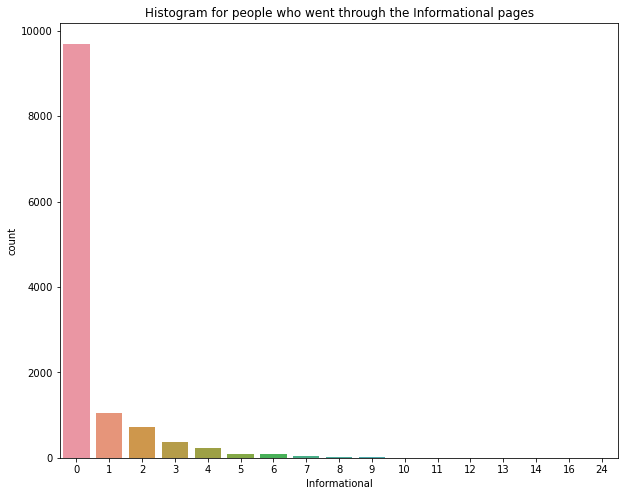

In [21]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Histogram for people who went through the Informational pages')
sns.countplot(df['Informational'])
plt.show()

In [22]:
# Checking the percentage of infomational visits
df['Informational'].value_counts(normalize=True)

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
11    0.000081
13    0.000081
24    0.000081
16    0.000081
Name: Informational, dtype: float64

In [23]:
# Converting the Informational Column to Categorical
df['Informational'] = df['Informational'].astype('category')

In [24]:
# Summary Statistics
df['Informational'].describe()

count     12330
unique       17
top           0
freq       9699
Name: Informational, dtype: int64

## Relation with the Target attribute

In [25]:
# Applying a crosstab inorder to perform a chi-square test
ct = pd.crosstab(index=df['Revenue'],columns=df['Informational'])
ct

Informational,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,24
Revenue,,,,,,,,,,,,,,,,,
False,8404,805,574,287,160,68,61,30,10,9,5,1,3,1,2,1,1
True,1295,236,154,93,62,31,17,6,4,6,2,0,2,0,0,0,0


In [26]:
#Chi Square Test
chi2_contingency(ct)

(176.8832900548877,
 3.5466035116225986e-29,
 16,
 array([[8.19813285e+03, 8.79910949e+02, 6.15345985e+02, 3.21197080e+02,
         1.87646715e+02, 8.36802920e+01, 6.59299270e+01, 3.04291971e+01,
         1.18335766e+01, 1.26788321e+01, 5.91678832e+00, 8.45255474e-01,
         4.22627737e+00, 8.45255474e-01, 1.69051095e+00, 8.45255474e-01,
         8.45255474e-01],
        [1.50086715e+03, 1.61089051e+02, 1.12654015e+02, 5.88029197e+01,
         3.43532847e+01, 1.53197080e+01, 1.20700730e+01, 5.57080292e+00,
         2.16642336e+00, 2.32116788e+00, 1.08321168e+00, 1.54744526e-01,
         7.73722628e-01, 1.54744526e-01, 3.09489051e-01, 1.54744526e-01,
         1.54744526e-01]]))

## Hypothesis

* H0: There is no relation between the Informational Column and the Revenue Column

* Ha: There is a relation between the Informational Column and the Revenue Column.

#### Observation:

The p-value for the test is less than the critical value.
We can reject the null hypothesis H0.

This shows that there is a relation between the Informational Column and the Target attribute.
* Decision: The Informational Column is a significant Feature in predicting our Target attribute.

# Informational Duration Column

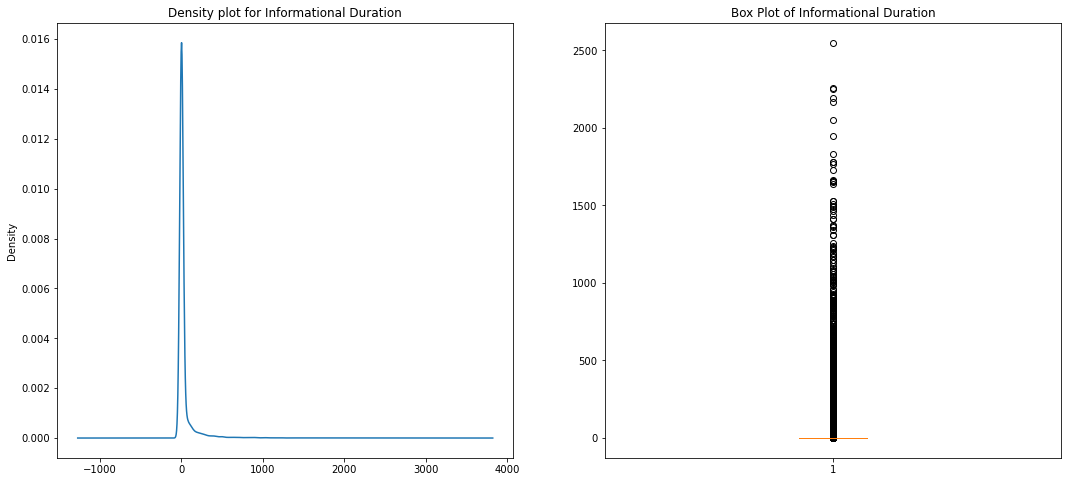

In [27]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['Informational_Duration'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Informational Duration')

axes[1].boxplot(df['Informational_Duration'])
axes[1].set_title('Box Plot of Informational Duration')
plt.show()

In [28]:
# Statistical Summary of Informational Duration Attribute
df['Informational_Duration'].describe()

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

In [29]:
# Skewness 
df['Informational_Duration'].skew()

7.579184715734214

## Relation with the Target attribute

In [30]:
# Seperating the values for independant t test
infoduration_a = df[df['Revenue']==True]['Informational_Duration']
infoduration_b = df[df['Revenue']==False]['Informational_Duration']

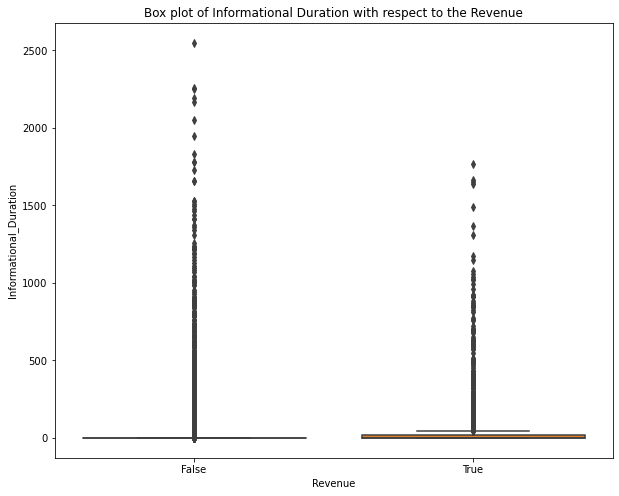

In [31]:
# Box plot
plt.figure(figsize=(10,8))
plt.title('Box plot of Informational Duration with respect to the Revenue')
sns.boxplot(y='Informational_Duration',x='Revenue',data=df,orient='v')
plt.show()

In [32]:
# Independant T Test
ttest_ind(infoduration_a,infoduration_b)

Ttest_indResult(statistic=7.829853965264804, pvalue=5.282870860721331e-15)

In [33]:
# Non Parametric test as Levene
# Center as median because the values are heavily skewed
levene(infoduration_a,infoduration_b,center='median')

LeveneResult(statistic=61.30661311737298, pvalue=5.2828708606337516e-15)

## Hypothesis

* H0: There is no relation between the Informational_Duration Column and the Revenue Column
*Ha: There is a relation between the Informational_Duration Column and the Revenue Column.

#### Observations:

The p-values are less than the α or the critical value 0.05.
Thus we can reject the null hypothesis H0 and accept the alternative hypothesis Ha.
* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

## Product Related

In [34]:
df['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

In [35]:
# Changing the Product Related Column as Categorical
df['ProductRelated'] = df['ProductRelated'].astype('category')

In [36]:
# Statistical Summary
df['ProductRelated'].describe()

count     12330
unique      311
top           1
freq        622
Name: ProductRelated, dtype: int64

## Relation with the Target attribute

In [37]:
ct = pd.crosstab(index=df['Revenue'],columns=df['ProductRelated'])
ct

ProductRelated,0,1,2,3,4,5,6,7,8,9,...,449,470,486,501,517,518,534,584,686,705
Revenue,,,,,,,,,,,,,,,,,,,,,
False,32,609,445,433,386,362,372,356,328,283,...,1,0,1,0,0,1,0,1,1,1
True,6,13,20,25,18,20,24,35,42,34,...,0,1,0,1,1,0,1,0,0,0


In [38]:
# Chi Square Test

chi2_contingency(ct)

(973.7726406478885,
 1.2201453528044542e-69,
 310,
 array([[3.21197080e+01, 5.25748905e+02, 3.93043796e+02, 3.87127007e+02,
         3.41483212e+02, 3.22887591e+02, 3.34721168e+02, 3.30494891e+02,
         3.12744526e+02, 2.67945985e+02, 2.78934307e+02, 2.60338686e+02,
         2.64564964e+02, 2.44278832e+02, 2.12159124e+02, 2.28218978e+02,
         2.19766423e+02, 1.91027737e+02, 1.69051095e+02, 1.84265693e+02,
         1.90182482e+02, 1.68205839e+02, 1.80039416e+02, 1.52145985e+02,
         1.62289051e+02, 1.30169343e+02, 1.31014599e+02, 1.49610219e+02,
         1.21716788e+02, 1.14109489e+02, 1.20026277e+02, 1.08192701e+02,
         1.00585401e+02, 1.02275912e+02, 8.70613139e+01, 8.53708029e+01,
         9.29781022e+01, 9.97401460e+01, 7.52277372e+01, 9.21328467e+01,
         6.00131387e+01, 7.18467153e+01, 6.50846715e+01, 6.17036496e+01,
         5.83226277e+01, 6.00131387e+01, 5.74773723e+01, 4.73343066e+01,
         5.24058394e+01, 5.07153285e+01, 5.40963504e+01, 4.39532847e+01,


## Hypothesis

* H0: There is no relation between the Product Related Column and the Revenue Column
*Ha: There is a relation between the Product Related Column and the Revenue Column.

#### Observations:

The p-value for the test is less than the critical value.
We can reject the null hypothesis H0.
This shows that there is a relation between the Informational Column and the Target attribute.

* Decision: The Informational Column is a significant Feature in predicting our Target attribute.

## Product Related Duration Column

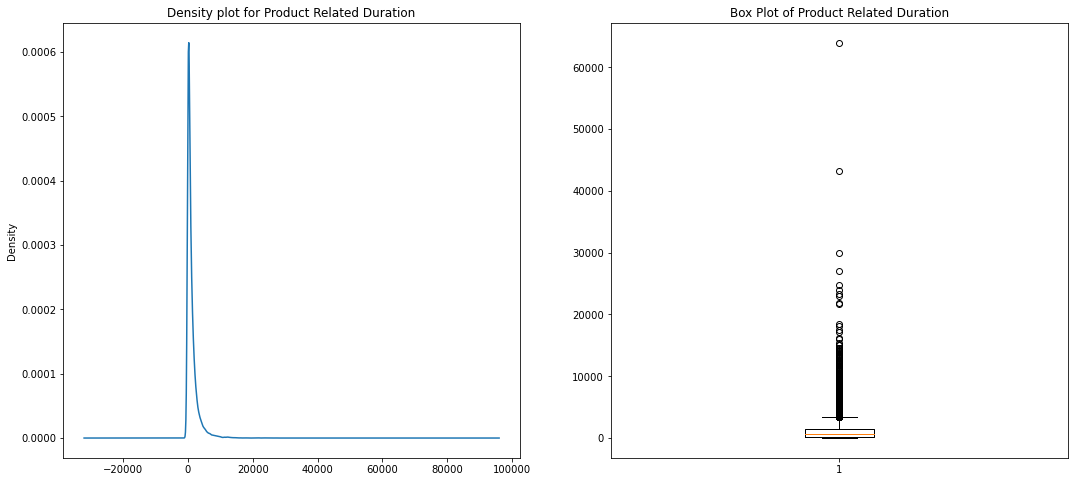

In [39]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['ProductRelated_Duration'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Product Related Duration')

axes[1].boxplot(df['ProductRelated_Duration'])
axes[1].set_title('Box Plot of Product Related Duration')
plt.show()

## Relation with the Target Feature


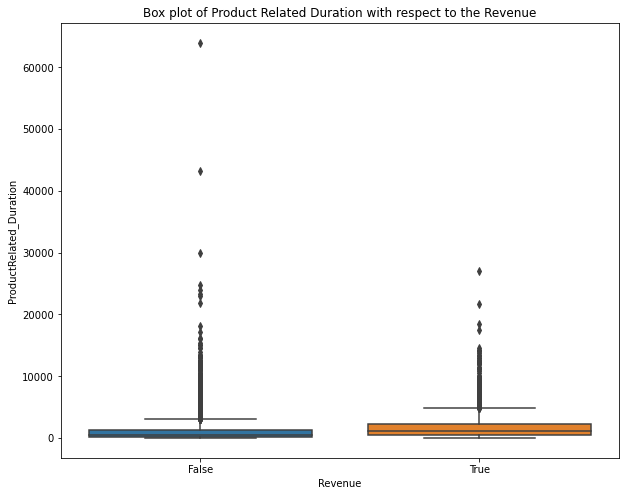

In [40]:
# Box plot
plt.figure(figsize=(10,8))
plt.title('Box plot of Product Related Duration with respect to the Revenue')
sns.boxplot(y='ProductRelated_Duration',x='Revenue',data=df,orient='v')
plt.show()

In [41]:
# Seperating the values for conducting statistical Tests
prodrelateddur_a = df[df['Revenue']==True]['ProductRelated_Duration']
prodrelateddur_b = df[df['Revenue']==False]['ProductRelated_Duration']

In [42]:
ttest_ind(prodrelateddur_a,prodrelateddur_b)

Ttest_indResult(statistic=17.11804905311505, pvalue=6.115338253467455e-65)

In [43]:
levene(prodrelateddur_a,prodrelateddur_b,center='median')

LeveneResult(statistic=104.53875562045589, pvalue=1.9296172666668837e-24)

## Hypothesis

* H0: There is no relation between the ProductRelated_Duration Column and the Revenue Column

* Ha:There is a relation between the ProductRelated_Duration Column and the Revenue Column.

#### Observations:

* The p-values are less than the α
 or the critical value 0.05.
* Thus we can reject the null hypothesis H0
 and accept the alternative hypothesis Ha.
 
* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

## Bounce Rate

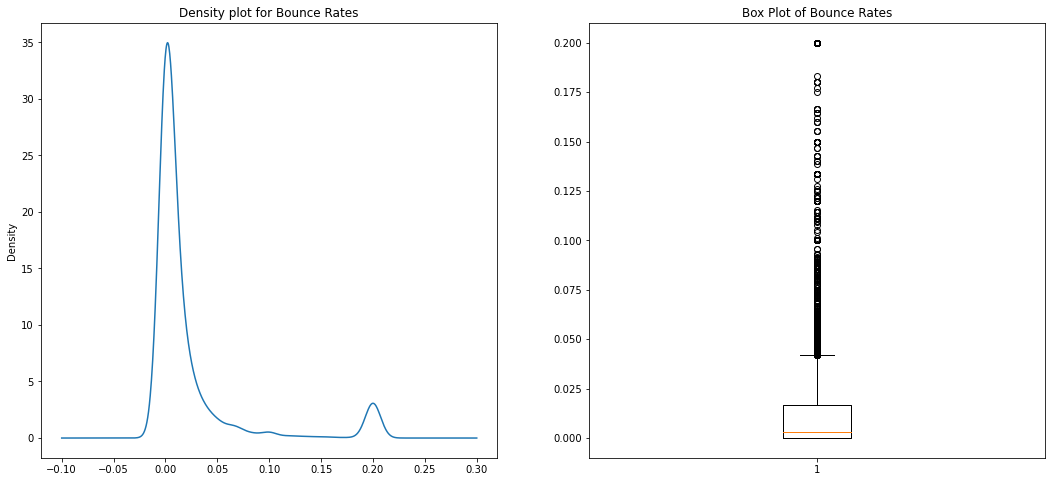

In [44]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['BounceRates'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Bounce Rates')

axes[1].boxplot(df['BounceRates'])
axes[1].set_title('Box Plot of Bounce Rates')
plt.show()

#### Relation with the Target Features

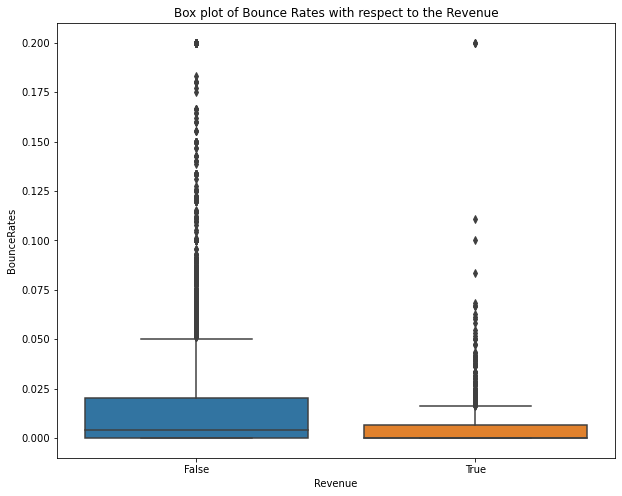

In [45]:
# Box plot
plt.figure(figsize=(10,8))
plt.title('Box plot of Bounce Rates with respect to the Revenue')
sns.boxplot(y='BounceRates',x='Revenue',data=df,orient='v')
plt.show()

In [46]:
# Seperating the Data For Bounce Rates
bounce_a = df[df['Revenue']==True]['BounceRates']
bounce_b = df[df['Revenue']==False]['BounceRates']

In [47]:
#Independant T Test

ttest_ind(bounce_a,bounce_b)

Ttest_indResult(statistic=-16.922637906938064, pvalue=1.594197538516729e-63)

In [48]:
#Levene Test

levene(bounce_a,bounce_b,center='trimmed')

LeveneResult(statistic=572.4309262595332, pvalue=2.145676163141818e-123)

## Hypothesis

* H0: There is no relation between the Bounce Rate Column and the Revenue Column
* Ha:There is a relation between the Bounce Rate Column and the Revenue Column.

## Observations:

The p-values are less than the α or the critical value 0.05.
Thus we can reject the null hypothesis 
H0 and accept the alternative hypothesis Ha.
* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

## Exit Rates

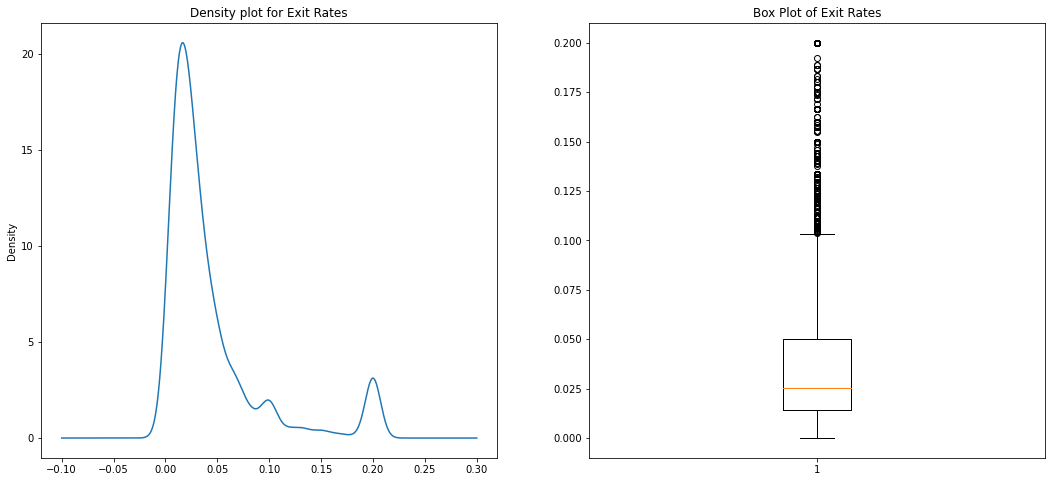

In [49]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['ExitRates'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Exit Rates')

axes[1].boxplot(df['ExitRates'])
axes[1].set_title('Box Plot of Exit Rates')
plt.show()

## Relation with Target Features

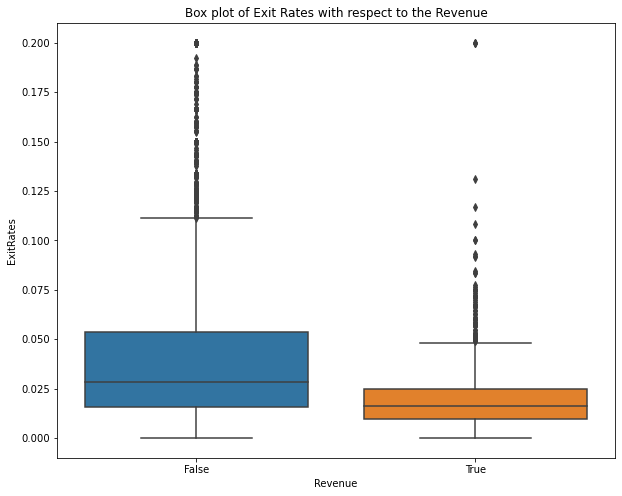

In [50]:
# Box plot
plt.figure(figsize=(10,8))
plt.title('Box plot of Exit Rates with respect to the Revenue')
sns.boxplot(y='ExitRates',x='Revenue',data=df,orient='v')
plt.show()

In [51]:
# Seperating the Data For Exit Rates
exit_a = df[df['Revenue']==True]['ExitRates']
exit_b = df[df['Revenue']==False]['ExitRates']

In [52]:
#Independant T Test

ttest_ind(exit_a,exit_b)

Ttest_indResult(statistic=-23.500776627688474, pvalue=1.6626536250736147e-119)

In [53]:
levene(exit_a,exit_b,center='trimmed')

LeveneResult(statistic=799.1070292604844, pvalue=8.035493837844225e-170)

# Hypothesis

* H0: There is no relation between the Exit Rate Column and the Revenue Column
* Ha:There is a relation between the Exit Rate Column and the Revenue Column.
## Observations:

* The p-values are less than the α or the critical value 0.05.
  Thus we can reject the null hypothesis 
* H0 and accept the alternative hypothesis Ha.
* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

# Page Value

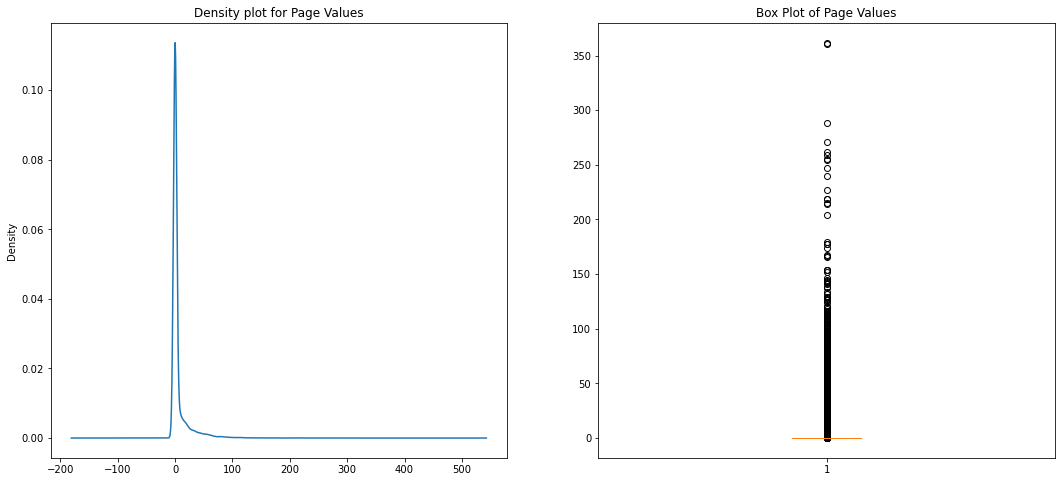

In [54]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes = axes.flatten()
# Density plot for Administrative Duration
df['PageValues'].plot(kind='kde',ax=axes[0])
axes[0].set_title('Density plot for Page Values')

axes[1].boxplot(df['PageValues'])
axes[1].set_title('Box Plot of Page Values')
plt.show()

## Relation with the Target Feature

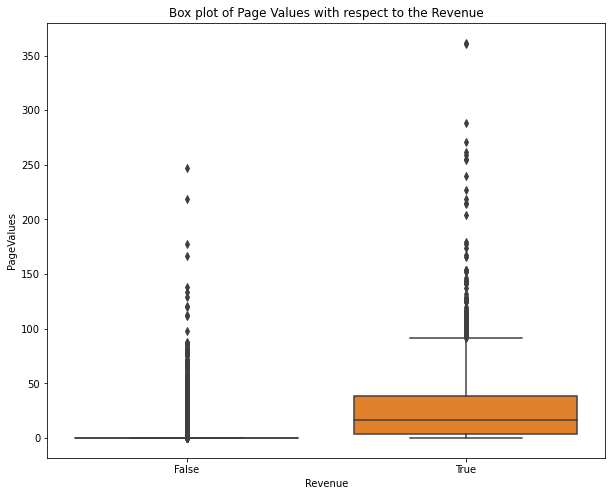

In [55]:
# Box plot
plt.figure(figsize=(10,8))
plt.title('Box plot of Page Values with respect to the Revenue')
sns.boxplot(y='PageValues',x='Revenue',data=df,orient='v')
plt.show()

In [56]:
# Seperating the data
page_a = df[df['Revenue']==True]['PageValues']
page_b = df[df['Revenue']==False]['PageValues']

In [57]:
# Independant T Test

ttest_ind(page_a,page_b)

Ttest_indResult(statistic=62.84316160063714, pvalue=0.0)

In [58]:
levene(page_a,page_b,center='median')

LeveneResult(statistic=3224.16055232711, pvalue=0.0)

## Hypothesis

* H0: There is no relation between the Page Values Column and the Revenue Column
* Ha: There is a relation between the Page Values Column and the Revenue Column.
* Observations:

The p-values are less than the α or the critical value 0.05.
Thus we can reject the null hypothesis H0 and accept the alternative hypothesis Ha.
* Decision: We can accept that the feature is significant in predicting the Revenue Attribute.

## Operating Systems

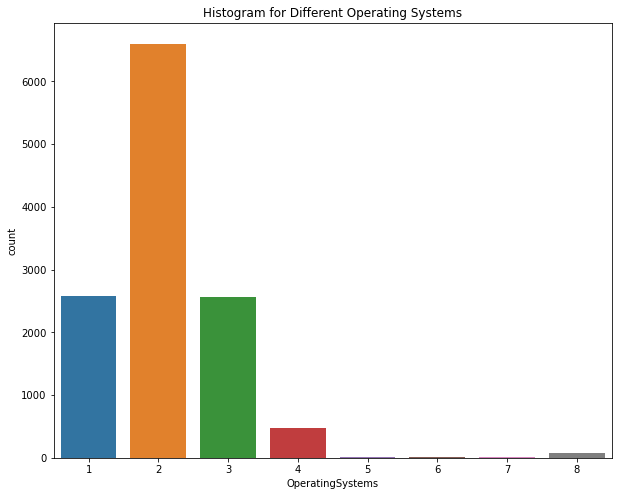

In [59]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Histogram for Different Operating Systems')
sns.countplot(df['OperatingSystems'])
plt.show()

In [60]:
# Converting the datatype to categorical
df['OperatingSystems'] = df['OperatingSystems'].astype('category')

In [61]:
# Statistical Summary
df['OperatingSystems'].describe()

count     12330
unique        8
top           2
freq       6601
Name: OperatingSystems, dtype: int64

## Relation with the Target Attribute

In [62]:
ct = pd.crosstab(index=df['Revenue'],columns=df['OperatingSystems'])
ct

OperatingSystems,1,2,3,4,5,6,7,8
Revenue,,,,,,,,
False,2206,5446,2287,393,5,17,6,62
True,379,1155,268,85,1,2,1,17


In [63]:
# Chi Square Test

chi2_contingency(ct)

(75.02705620298461,
 1.4160941129614507e-13,
 7,
 array([[2.18498540e+03, 5.57953139e+03, 2.15962774e+03, 4.04032117e+02,
         5.07153285e+00, 1.60598540e+01, 5.91678832e+00, 6.67751825e+01],
        [4.00014599e+02, 1.02146861e+03, 3.95372263e+02, 7.39678832e+01,
         9.28467153e-01, 2.94014599e+00, 1.08321168e+00, 1.22248175e+01]]))

## Hypothesis

* H0: There is no relation between the Operating Systems Column and the Revenue Column
* Ha:There is a relation between the Operating Systems Column and the Revenue Column.

#### Observation:

The p-value for the test is less than the critical value.
We can reject the null hypothesis H0.
This shows that there is a relation between the Operating Systems Column and the Target attribute.
* Decision: The Operating Systems Column is a significant Feature in predicting our Target attribute.

## Visitor Type

In [64]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

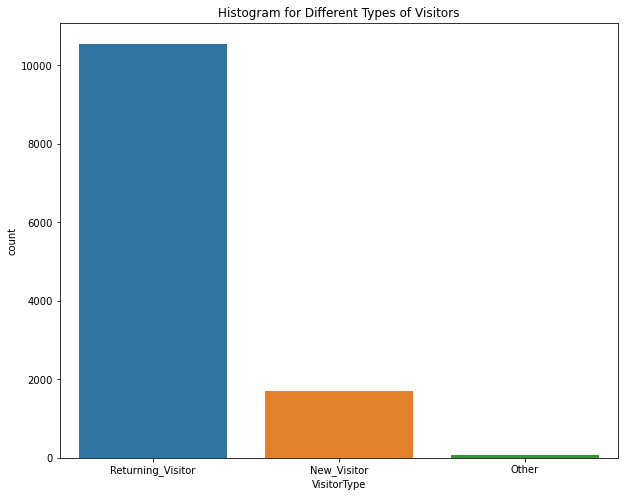

In [65]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Histogram for Different Types of Visitors')
sns.countplot(df['VisitorType'])
plt.show()

In [66]:
df['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

## Relation with Target Features

In [67]:
ct = pd.crosstab(index=df['Revenue'],columns=df['VisitorType'])
ct

VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
False,1272,69,9081
True,422,16,1470


In [68]:
#Chi Square Test

chi2_contingency(ct)

(135.2519228192047,
 4.269904152293867e-30,
 2,
 array([[1431.86277372,   71.84671533, 8918.29051095],
        [ 262.13722628,   13.15328467, 1632.70948905]]))

## Hypothesis

H0:There is no relation between the Visitor Type Column and the Revenue Column

Ha:There is a relation between the Visitor Type Column and the Revenue Column.

Observation:

The p-value for the test is less than the critical value.
We can reject the null hypothesis H0.

This shows that there is a relation between the Visitor Type Column and the Target attribute.
* Decision: The Visitor Type Column is a significant Feature in predicting our Target attribute.

## Weekend

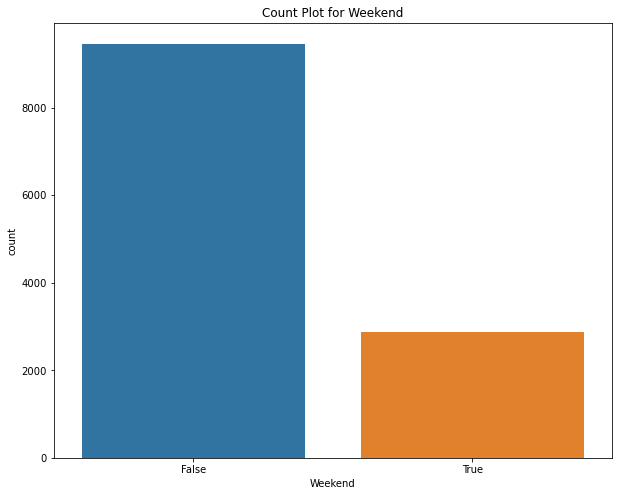

In [69]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Weekend')
sns.countplot(df['Weekend'])
plt.show()

In [70]:
df['Weekend'].value_counts(normalize=True)

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

## Relation with the Target

In [71]:
ct = pd.crosstab(index=df['Revenue'],columns=df['Weekend'])
ct

Weekend,False,True
Revenue,,
False,8053,2369
True,1409,499


In [72]:
#Chi Square Test

chi2_contingency(ct)

(10.390978319534856,
 0.0012663251061221968,
 1,
 array([[7997.80729927, 2424.19270073],
        [1464.19270073,  443.80729927]]))

## Hypothesis

* H0: There is no relation between the Weekend Column and the Revenue Column
* Ha: There is a relation between the Weekend Column and the Revenue Column.

## Observation:

The p-value for the test is less than the critical value.
We can reject the null hypothesis H0.

This shows that there is a relation between the Weekend Column and the Target attribute.

* Decision: The Weekend Column is a significant Feature in predicting our Target attribute.

## Region

In [73]:
df['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

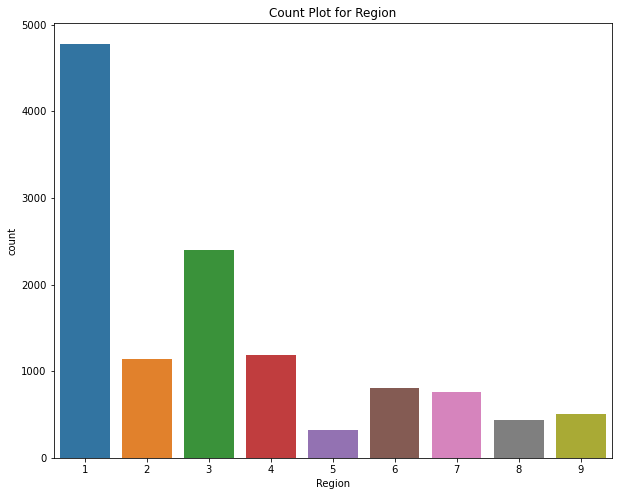

In [74]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Region')
sns.countplot(df['Region'])
plt.show()

In [75]:
df['Region'] = df['Region'].astype('category')

In [76]:
df['Region'].describe()

count     12330
unique        9
top           1
freq       4780
Name: Region, dtype: int64

## Relation with the Target Feature

In [77]:
ct = pd.crosstab(index=df['Revenue'],columns=df['Region'])
ct

Region,1,2,3,4,5,6,7,8,9
Revenue,,,,,,,,,
False,4009,948,2054,1007,266,693,642,378,425
True,771,188,349,175,52,112,119,56,86


In [78]:
# Chi Square Test
chi2_contingency(ct)

(9.252751430579844,
 0.3214249979076556,
 8,
 array([[4040.32116788,  960.21021898, 2031.14890511,  999.0919708 ,
          268.79124088,  680.43065693,  643.23941606,  366.84087591,
          431.92554745],
        [ 739.67883212,  175.78978102,  371.85109489,  182.9080292 ,
           49.20875912,  124.56934307,  117.76058394,   67.15912409,
           79.07445255]]))

## Hypothesis

* H0: There is no relation between the Region Column and the Revenue Column
* Ha: There is a relation between the Region Column and the Revenue Column.

#### Observation:

The p-value for the test is more than the critical value.
We fail to reject the null hypothesis H0.

This shows that there is no relation between the Region Column and the Target attribute.

* Decision: The Region Column is not a significant Feature in predicting our Target attribute.

## TrafficType

In [79]:
df['TrafficType'].nunique()

20

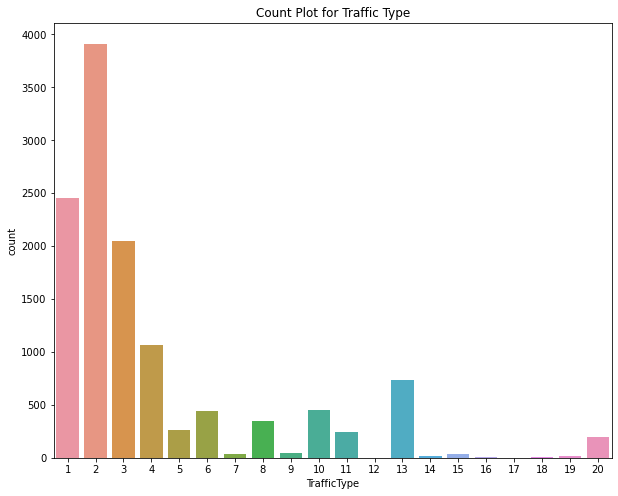

In [80]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Traffic Type')
sns.countplot(df['TrafficType'])
plt.show()

In [81]:
df['TrafficType'] = df['TrafficType'].astype('category')

In [82]:
# Statistical Summary
df['TrafficType'].describe()

count     12330
unique       20
top           2
freq       3913
Name: TrafficType, dtype: int64

## Relation with the Target Feature

In [83]:
ct = pd.crosstab(index=df['Revenue'],columns=df['TrafficType'])
ct

TrafficType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Revenue,,,,,,,,,,,,,,,,,,,,
False,2189,3066,1872,904,204,391,28,248,38,360,200,1,695,11,38,2,1,10,16,148
True,262,847,180,165,56,53,12,95,4,90,47,0,43,2,0,1,0,0,1,50


In [84]:
chi2_contingency(ct)

(373.1455646881486,
 1.652735258160153e-67,
 19,
 array([[2.07172117e+03, 3.30748467e+03, 1.73446423e+03, 9.03578102e+02,
         2.19766423e+02, 3.75293431e+02, 3.38102190e+01, 2.89922628e+02,
         3.55007299e+01, 3.80364964e+02, 2.08778102e+02, 8.45255474e-01,
         6.23798540e+02, 1.09883212e+01, 3.21197080e+01, 2.53576642e+00,
         8.45255474e-01, 8.45255474e+00, 1.43693431e+01, 1.67360584e+02],
        [3.79278832e+02, 6.05515328e+02, 3.17535766e+02, 1.65421898e+02,
         4.02335766e+01, 6.87065693e+01, 6.18978102e+00, 5.30773723e+01,
         6.49927007e+00, 6.96350365e+01, 3.82218978e+01, 1.54744526e-01,
         1.14201460e+02, 2.01167883e+00, 5.88029197e+00, 4.64233577e-01,
         1.54744526e-01, 1.54744526e+00, 2.63065693e+00, 3.06394161e+01]]))

## Hypothesis

* H0: There is no relation between the TrafficType Column and the Revenue Column
* Ha:There is a relation between the TrafficType Column and the Revenue Column.

#### Observation:

The p-value for the test is less than the critical value.
We reject the null hypothesis H0.
This shows that there is a relation between the TrafficType Column and the Target attribute.

* Decision: The TrafficType Column is a significant Feature in predicting our Target attribute.

## Browser

In [85]:
df['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

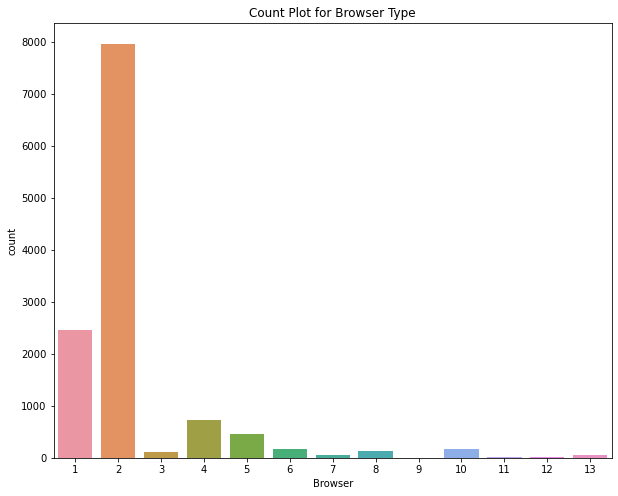

In [86]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Browser Type')
sns.countplot(df['Browser'])
plt.show()

In [87]:
df['Browser'] = df['Browser'].astype('category')

In [88]:
df['Browser'].describe()

count     12330
unique       13
top           2
freq       7961
Name: Browser, dtype: int64

## Relation with the target feature

In [89]:
ct = pd.crosstab(index=df['Revenue'],columns=df['Browser'])
ct

Browser,1,2,3,4,5,6,7,8,9,10,11,12,13
Revenue,,,,,,,,,,,,,
False,2097,6738,100,606,381,154,43,114,1,131,5,7,45
True,365,1223,5,130,86,20,6,21,0,32,1,3,16


In [90]:
chi2_contingency(ct)

(27.715299401381564,
 0.00608754317955108,
 12,
 array([[2.08101898e+03, 6.72907883e+03, 8.87518248e+01, 6.22108029e+02,
         3.94734307e+02, 1.47074453e+02, 4.14175182e+01, 1.14109489e+02,
         8.45255474e-01, 1.37776642e+02, 5.07153285e+00, 8.45255474e+00,
         5.15605839e+01],
        [3.80981022e+02, 1.23192117e+03, 1.62481752e+01, 1.13891971e+02,
         7.22656934e+01, 2.69255474e+01, 7.58248175e+00, 2.08905109e+01,
         1.54744526e-01, 2.52233577e+01, 9.28467153e-01, 1.54744526e+00,
         9.43941606e+00]]))

## Hypothesis

* H0: There is no relation between the Browser Column and the Revenue Column
* Ha: There is a relation between the Browser Column and the Revenue Column.

## Observation:

The p-value for the test is more than the critical value.
We fail to reject the null hypothesis H0.
This shows that there is no relation between the Browser Column and the Target attribute.

* Decision: The Browser Column is not a significant Feature in predicting our Target attribute.

## Month

In [91]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

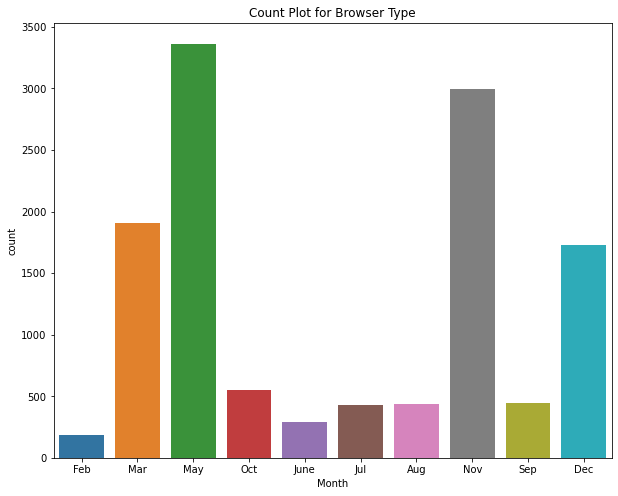

In [92]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Browser Type')
sns.countplot(df['Month'])
plt.show()

In [93]:
df['Month'].describe()

count     12330
unique       10
top         May
freq       3364
Name: Month, dtype: object

## Relation with the target Feature

In [94]:
ct = pd.crosstab(index=df['Revenue'],columns=df['Month'])
ct

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Revenue,,,,,,,,,,
False,357,1511,181,366,259,1715,2999,2238,434,362
True,76,216,3,66,29,192,365,760,115,86


In [95]:
chi2_contingency(ct)

(384.93476153599426,
 2.2387855164805443e-77,
 9,
 array([[ 365.99562044, 1459.75620438,  155.5270073 ,  365.15036496,
          243.43357664, 1611.90218978, 2843.43941606, 2534.07591241,
          464.04525547,  378.67445255],
        [  67.00437956,  267.24379562,   28.4729927 ,   66.84963504,
           44.56642336,  295.09781022,  520.56058394,  463.92408759,
           84.95474453,   69.32554745]]))

## Hypothesis

* H0: There is no relation between the Month Column and the Revenue Column
* Ha:There is a relation between the Month Column and the Revenue Column.
Observation:

The p-value for the test is less than the critical value.
We reject the null hypothesis H0.
This shows that there is a relation between the Month Column and the Target attribute.

* Decision: The Month Column is a significant Feature in predicting our Target attribute.

# Special Day

In [96]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

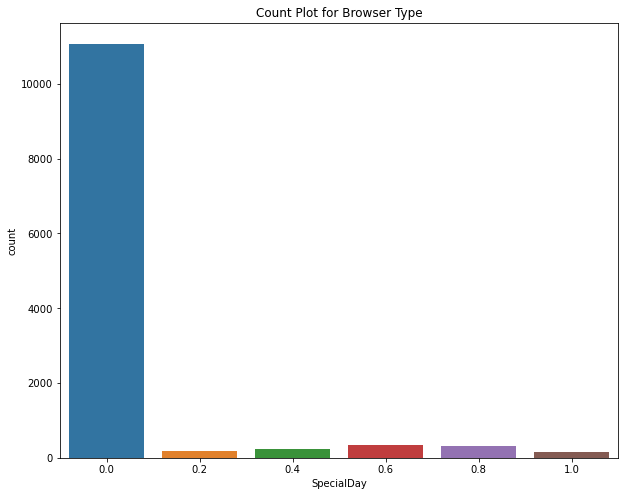

In [97]:
plt.figure(figsize=(10,8))
# Count plot
plt.title('Count Plot for Browser Type')
sns.countplot(df['SpecialDay'])
plt.show()

In [98]:
df['SpecialDay'] = df['SpecialDay'].astype('category')

In [99]:
df['SpecialDay'].describe()

count     12330.0
unique        6.0
top           0.0
freq      11079.0
Name: SpecialDay, dtype: float64

## Relation between the feature and the target

In [100]:
ct = pd.crosstab(index=df['Revenue'],columns=df['SpecialDay'])
ct

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
False,9248,164,230,322,314,144
True,1831,14,13,29,11,10


In [101]:
chi2_contingency(ct)

(96.07690626757704,
 3.5432443403841987e-19,
 5,
 array([[9364.58540146,  150.45547445,  205.39708029,  296.68467153,
          274.7080292 ,  130.16934307],
        [1714.41459854,   27.54452555,   37.60291971,   54.31532847,
           50.2919708 ,   23.83065693]]))

## Hypothesis

* H0: There is no relation between the Special Day Column and the Revenue Column
* Ha: There is a relation between the Special Day Column and the Revenue Column.

## Observation:

The p-value for the test is less than the critical value.
We reject the null hypothesis H0.
This shows that there is a relation between the Special Day Column and the Target attribute.
* Decision: The Special Day Column is a significant Feature in predicting our Target attribute.

#                             Data Handling And Modeling

In [102]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

log_reg = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [104]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve

In [105]:
df.loc[:,['Administrative','Informational','ProductRelated']]=df.loc[:,['Administrative','Informational','ProductRelated']].astype(np.number)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  float64 
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  float64 
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  float64 
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  object  
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [107]:
sorted(df['Month'].value_counts().index)

['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

In [108]:
df["Month"] = df["Month"].replace({"Feb" : 0,
                              "June" : 3,
                              "Aug" : 5,
                              "Jul" : 4,
                              "Sep" : 6,
                              "Oct" : 8,
                              "Dec" : 10,
                              "Mar" : 1,
                              "Nov" : 9,
                              "May" : 2})

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  float64 
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  float64 
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  float64 
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  int64   
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [110]:
df_num=df.iloc[:,:9]
df_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

In [111]:
for i in df.iloc[:,9:]:
    df[i]=df[i].astype(str)

In [112]:
df_cat=df.select_dtypes(include='O')

In [113]:
df_cat.columns

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [114]:
df_cat.drop('Revenue',inplace=True,axis=1)

C:\Users\91917\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
num_pip=Pipeline(steps=[('scaler', StandardScaler())])

In [116]:
cat_pip=Pipeline(steps=[('encoder', OneHotEncoder())])

In [117]:
from sklearn.compose import ColumnTransformer

In [118]:
data=ColumnTransformer([('Categorical',cat_pip,df_cat),
                        (('Numerical',num_pip,df_num))
])

In [119]:
data

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                       SpecialDay Month OperatingSystems Browser Region TrafficType  \
0            0.0     0                1       1      1           1   
1            0.0     0                2       2      1           2   
2            0.0     0                4       1      9           3   
3            0.0     0                3       2      2           4   
4            0.0     0                3       3      1           4   
...          ...   ...              ...     ...    ...         ...   
12325        0.0    10                4       6      1           1   
12326        0.0     9                3       2      1           8   
12327        0.0     9                3       2      1          13   
12328        0.0     9                2       2      3          11   
12329        0.0     9                3       2      1           2  

In [120]:
ohe=OneHotEncoder()
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [121]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [122]:
df_new

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.2,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0,...,1,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0,...,0,1,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0,...,0,0,0,0,0,0,0,0,1,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0,...,0,0,0,0,0,1,0,0,1,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0,...,0,0,0,0,0,0,0,0,1,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


## Modelling

In [123]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [124]:
X=df_new
y=df['Revenue']

In [125]:
y=lab.fit_transform(y)

In [126]:
print(X.shape)
print(y.shape)

(12330, 72)
(12330,)


In [127]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X, y = smt.fit_resample(X, y)
print(X.shape)
print(y.shape)

(20844, 72)
(20844,)


In [128]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=.20)

## LOGISTIC REGRESSION

In [129]:
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test1)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test1, y_test1)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test1, y_test1)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print('The accuracy score for the data :',accuracy_score(y_test1,y_pred))
    print('The recall score for the data :',recall_score(y_test1,y_pred,))
    print('The precision for the data :',precision_score(y_test1,y_pred))
    print('The f1 score for the data :',f1_score(y_test1,y_pred))
    print('The confusion matrix for the data :',confusion_matrix(y_test1,y_pred))
    print('The classification report for the data :',classification_report(y_test1,y_pred))

In [130]:
from sklearn.model_selection import cross_val_score

evaluate_model(X_train1, y_train1, LogisticRegression())

C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Score:0.862728635682159
Cross V Score: 0.8439584154477696 +/- 0.005211246733504966
Testing Score: 0.8558407291916527
Cross & Test Diff: -0.011882313743883044
Standard Deviations Away: -2.2801287967210238
The accuracy score for the data : 0.8558407291916527
The recall score for the data : 0.8042532624456259
The precision for the data : 0.8946236559139785
The f1 score for the data : 0.8470348689233902
The confusion matrix for the data : [[1904  196]
 [ 405 1664]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.82      0.91      0.86      2100
           1       0.89      0.80      0.85      2069

    accuracy                           0.86      4169
   macro avg       0.86      0.86      0.86      4169
weighted avg       0.86      0.86      0.86      4169



C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [131]:
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test1)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test1, y_test1)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test1, y_test1)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print('The accuracy score for the data :',accuracy_score(y_test1,y_pred))
    print('The recall score for the data :',recall_score(y_test1,y_pred,))
    print('The precision for the data :',precision_score(y_test1,y_pred))
    print('The f1 score for the data :',f1_score(y_test1,y_pred))
    print('The confusion matrix for the data :',confusion_matrix(y_test1,y_pred))
    print('The classification report for the data :',classification_report(y_test1,y_pred))

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier(max_depth=8)

In [133]:
evaluate_model(X_train1, y_train1, dt)

Training Score:0.9350524737631184
Cross V Score: 0.9068067362826627 +/- 0.0021578565696344426
Testing Score: 0.905492923962581
Cross & Test Diff: 0.0013138123200817642
Standard Deviations Away: 0.6088506245363352
The accuracy score for the data : 0.905492923962581
The recall score for the data : 0.91686805219913
The precision for the data : 0.8952336007550732
The f1 score for the data : 0.9059216809933142
The confusion matrix for the data : [[1878  222]
 [ 172 1897]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.92      0.89      0.91      2100
           1       0.90      0.92      0.91      2069

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



## Random Forest

In [134]:
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test1)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test1, y_test1)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test1, y_test1)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print('The accuracy score for the data :',accuracy_score(y_test1,y_pred))
    print('The recall score for the data :',recall_score(y_test1,y_pred,))
    print('The precision for the data :',precision_score(y_test1,y_pred))
    print('The f1 score for the data :',f1_score(y_test1,y_pred))
    print('The confusion matrix for the data :',confusion_matrix(y_test1,y_pred))
    print('The classification report for the data :',classification_report(y_test1,y_pred))

In [135]:
rfm=RandomForestClassifier()
evaluate_model(X_train1, y_train1, rfm)

Training Score:1.0
Cross V Score: 0.9340931652242469 +/- 0.004260160008428362
Testing Score: 0.9347565363396498
Cross & Test Diff: -0.0006633711154029331
Standard Deviations Away: -0.15571507034724286
The accuracy score for the data : 0.9347565363396498
The recall score for the data : 0.9400676655389076
The precision for the data : 0.9292881032011466
The f1 score for the data : 0.9346468044209513
The confusion matrix for the data : [[1952  148]
 [ 124 1945]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2100
           1       0.93      0.94      0.93      2069

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169



## Bagging

In [136]:
from sklearn.ensemble import BaggingClassifier

In [137]:
base=BaggingClassifier(LogisticRegression())
evaluate_model(X_train1, y_train1, base)

C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Score:0.8524137931034482
Cross V Score: 0.8478565383740598 +/- 0.005530748035113854
Testing Score: 0.8503238186615495
Cross & Test Diff: -0.0024672802874896593
Standard Deviations Away: -0.4461024569959222
The accuracy score for the data : 0.8503238186615495
The recall score for the data : 0.7931367810536492
The precision for the data : 0.8933043004899293
The f1 score for the data : 0.8402457757296466
The confusion matrix for the data : [[1904  196]
 [ 428 1641]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.82      0.91      0.86      2100
           1       0.89      0.79      0.84      2069

    accuracy                           0.85      4169
   macro avg       0.85      0.85      0.85      4169
weighted avg       0.85      0.85      0.85      4169



C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
KNN=KNeighborsClassifier()
evaluate_model(X_train1, y_train1, KNN)

Training Score:0.9048875562218891
Cross V Score: 0.8368216203974407 +/- 0.0008877452356471125
Testing Score: 0.8464859678579996
Cross & Test Diff: -0.009664347460558886
Standard Deviations Away: -10.886397439817475
The accuracy score for the data : 0.8464859678579996
The recall score for the data : 0.9217013049782503
The precision for the data : 0.7995807127882599
The f1 score for the data : 0.8563089357880557
The confusion matrix for the data : [[1622  478]
 [ 162 1907]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.91      0.77      0.84      2100
           1       0.80      0.92      0.86      2069

    accuracy                           0.85      4169
   macro avg       0.85      0.85      0.85      4169
weighted avg       0.85      0.85      0.85      4169



## Naives bayes

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
gnb=GaussianNB()
evaluate_model(X_train1, y_train1, gnb)

Training Score:0.8083958020989506
Cross V Score: 0.8089352827227687 +/- 0.005360132146529768
Testing Score: 0.8009114895658431
Cross & Test Diff: 0.008023793156925585
Standard Deviations Away: 1.4969394293982683
The accuracy score for the data : 0.8009114895658431
The recall score for the data : 0.9057515708071532
The precision for the data : 0.7469111199681148
The f1 score for the data : 0.818698121450415
The confusion matrix for the data : [[1465  635]
 [ 195 1874]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.88      0.70      0.78      2100
           1       0.75      0.91      0.82      2069

    accuracy                           0.80      4169
   macro avg       0.81      0.80      0.80      4169
weighted avg       0.82      0.80      0.80      4169



## Boosting

In [142]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [143]:
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [144]:
# Ada boost
evaluate_model(X_train1, y_train1, adc)

Training Score:0.9224587706146926
Cross V Score: 0.9197603782883831 +/- 0.003847595563894387
Testing Score: 0.9066922523386903
Cross & Test Diff: 0.013068125949692755
Standard Deviations Away: 3.3964396030402177
The accuracy score for the data : 0.9066922523386903
The recall score for the data : 0.9110681488641856
The precision for the data : 0.9019138755980861
The f1 score for the data : 0.9064679009377254
The confusion matrix for the data : [[1895  205]
 [ 184 1885]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2100
           1       0.90      0.91      0.91      2069

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



In [145]:
# GD boost
evaluate_model(X_train1, y_train1, gbc)

Training Score:0.9290554722638681
Cross V Score: 0.922159096193034 +/- 0.0021339969519737242
Testing Score: 0.9126888942192373
Cross & Test Diff: 0.009470201973796777
Standard Deviations Away: 4.437776710523335
The accuracy score for the data : 0.9126888942192373
The recall score for the data : 0.9197680038666022
The precision for the data : 0.9057591623036649
The f1 score for the data : 0.9127098321342926
The confusion matrix for the data : [[1902  198]
 [ 166 1903]]
The classification report for the data :               precision    recall  f1-score   support

           0       0.92      0.91      0.91      2100
           1       0.91      0.92      0.91      2069

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91917\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

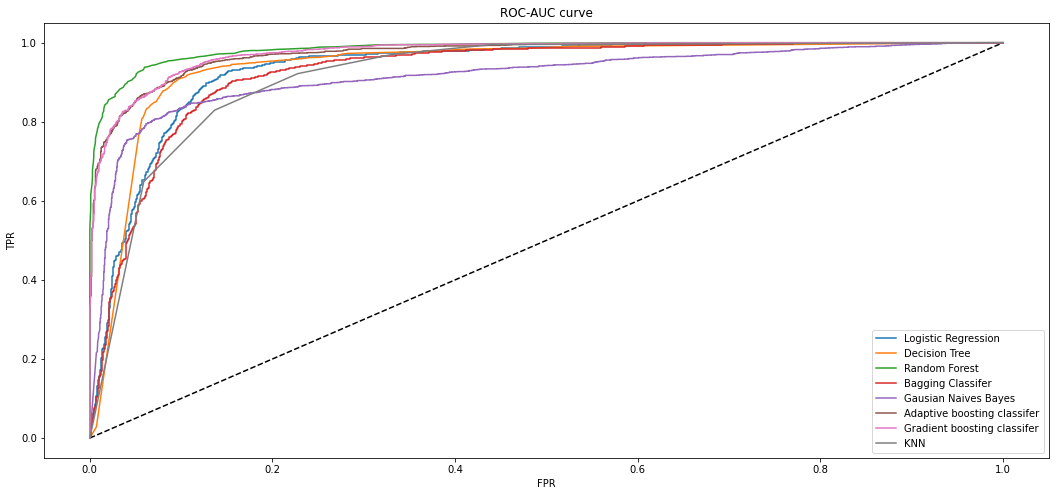

In [150]:
#ROC Curve
from sklearn.metrics import roc_curve

y_pred_prob1 = log_reg.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)

y_pred_prob2 = dt.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test1, y_pred_prob2)


y_pred_prob3 = rfm.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test1, y_pred_prob3)

y_pred_prob4 = base.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test1, y_pred_prob4)

y_pred_prob5 = gnb.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr5 , tpr5, thresholds4 = roc_curve(y_test1, y_pred_prob5)

y_pred_prob6 = adc.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr6 , tpr6, thresholds4 = roc_curve(y_test1, y_pred_prob6)

y_pred_prob7 = gbc.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr7 , tpr7, thresholds4 = roc_curve(y_test1, y_pred_prob7)
y_pred_prob8 = KNN.fit(X_train1,y_train1).predict_proba(X_test1)[:,1]
fpr8 , tpr8, thresholds8 = roc_curve(y_test1, y_pred_prob8)

plt.figure(figsize=(18,8))

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "Bagging Classifer ")
plt.plot(fpr5, tpr5, label= "Gausian Naives Bayes")
plt.plot(fpr6, tpr6, label= "Adaptive boosting classifer")
plt.plot(fpr7, tpr7, label= "Gradient boosting classifer")
plt.plot(fpr8, tpr8, label= "KNN")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC-AUC curve')
plt.show()


Conclusion The Accuracy Score of a model shows how many correct predictions were made of the total predictions. Hence it is required that the accuracy of the model be high along with the dataset being balanced. On the other hand Recall is the number of correct positive predictions divided by the number of all relevant predictions. Recall score tells us how much of the Customers who generate Revenue are predicted correctly out of the total Customer who Generated Revenue. Hence a high recall score would mean we can predict the number of customers generate revenue correctly.

Accuracy can be sacrificed for a better recall score and the reasoning for that is, loss potential customers would be high if our recall score is low and there by our model predicting erroneously. Even if accuracy is lower with a higher recall score model, it could be used persuade customers by taking actions to make them buy, by other factors such as Product Related Page Duration times, reducing bounce and exit rates, etc.

This model provides the company the chance to better predict the customer intentions based on their habits on the website and the knowledge on how to target and push the right customers to increase the overall chances of converting a visit into a purchase. With more and more customers moving towards online purchasing this knowledge will be the boon necessary for a company to survive and grow in the online market.

However, when the models were evaluate with the validation set,Random Forest Classifier performs better in terms of Recall and Accuracy score, with 94% Recall Score and 72% Accuracy Rate. It would be best to choose this model on the basis that accuracy can be sacrificed for a better recall score, with the aim of serving a larger customer base and trying to convert them into generating revenue rather than, aiming at a selected few customers with a higher accuracy.

The Final Model Selected would be Random Forest Classifer lassifier for predicting and Customers Intention to Purchase from the particular dataset that we have collected.